# Lecture 17 - Random Numbers in Python & Monte Carlo - HW 8

## 1) Random Numbers and Radio Activity

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and
half-lives thus

<img src="Decay9.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />

(Technically, $^{209}$Bi isnt really stable, but it has a half-life of more than $10^{19}$ years, a billion
times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms
by dividing time into slices of length $\delta t = 1$s each and on each step doing
the following:

1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from $p(t) = 1 − 2t/\tau $, where $\tau$ is the half life.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top,
to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds
and make a single graph showing the four numbers as a function of time on the same axes.



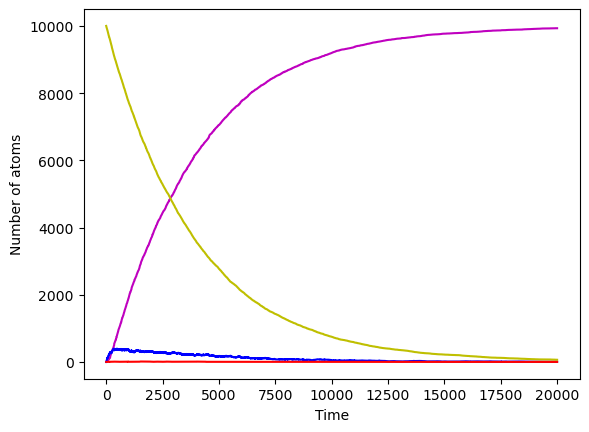

In [1]:
# Write Code Here
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show
import random

NTHl = 0
N213Bi = 10000            
NPb = 0 
N209Bi = 0
tauPb209 = 3.3*60  
tauBi213 = 46*60
tauT1209 = 2.2*60
h = 1.0               
p1 = 1 - 2**(-h/tauPb209)   
p2 = 1 - 2**(-h/tauBi213)   
p3 = 1 - 2**(-h/tauT1209)   
tmax = 20000           


tpoints = arange(0.0,tmax,h)
Tlpoints = [] 
Pbpoints = [] 
Bi213points = []
Bi209points = []

# Main loop
for t in tpoints:    
    Bi209points.append(N209Bi) 
    Pbpoints.append(NPb) 
    Bi213points.append(N213Bi) 
    Tlpoints.append(NTHl) 

    

    decay1 = 0
    for i in range(NPb): 
        if np.random.random() < p1:
            decay1 += 1
            NPb -= decay1  
            N209Bi += decay1

    decay2 = 0
    for i in range(NTHl): 
        if np.random.random() < p3:
            decay2 += 1
    NTHl -= decay2  
    NPb += decay2

    decay3 = 0
    for i in range(N213Bi): 
        if np.random.random() < p2:
            decay3 += 1
            if np.random.random() <= 0.0209:
                N213Bi -= 1  
                NTHl += 1
            else:
                N213Bi -= 1
                NPb += 1
# Make the graph
plot(tpoints,Bi209points, c='m') 
plot(tpoints,Pbpoints, c='b')
plot(tpoints,Bi213points, c='y')
plot(tpoints,Tlpoints, c ='r')
xlabel("Time")
ylabel("Number of atoms")
show()   

## 2) Lets Make a Deal
Monte Carlo methods are often useful to ensure that our thinking is reasonable. A good
example of this kind of use is to investigate a simple problem that generated much attention
several years ago and for which many mathematicians obtained an incorrect solution.

The problem was the analysis of the optimal strategy in a television game show popular at
the time. The show was Lets Make a Deal with host Monty Hall. At some point in the show,
a contestant was given a choice of selecting one of three possible items, each concealed behind
one of three closed doors. The items varied considerably in value.

After the contestant made a choice but before the chosen door was opened, the
host, who knew where the most valuable item was, would open one of the doors
not selected and reveal a worthless item.

**The host would then offer to let the contestant select a different door from what was originally
selected. The question, of course, is should the contestant switch?**

<img src="Monty_Hall_Problem.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />



Much interest in this problem was generated when it was analyzed by a popular magazine
writer, Marilyn vos Savant, who concluded that the optimal strategy is to switch. This
strategy is counterintuitive to many mathematicians, who would say that there is nothing to
be gained by switching; that is, that the probability of improving the selection is 0.5. Study
this problem by Monte Carlo methods. Be careful to understand all of the assumptions

**Write a code that implement this test for 1000 “games”, 500 where the contestant choose to KEEP their choice of door, and 500 where contestant chooses to CHANGE their choice of door:**


## Determine if there is probability of improving the selection by switching, and if so by how much?



In [11]:
# Write Code Here
import numpy as np

stay = []  #stores how many times contestant chose to stay
switch = [] #stores how many times contestant chose to switch
doors = [0,1,2]  #This list will be used in the code to identify each of the three doors

fivehundredgames = range(500)  #function for first fivehundred games where contestants ONLY switch
for i in fivehundredgamesswitch:
    carprize = np.random.randint(0,3) #carprize is randomly chosen for a door out of the three
    contestantguess = np.random.randint(0,3)  #contestant randomly guesses a door
    if carprize != contestantguess:
        switch.append(1)  #If switching made the contestant to choose the door with the prize, count it
    else:
        switch.append(0)   #Since this 500 only counts switches, this scenario is not counted
    
#Now for keeping       
fivehundredgameskeep = range(500)
for i in fivehundredgameskeep:
    carprize = np.random.randint(0,3)
    contestantguess = np.random.randint(0,3)
    if carprize == contestantguess:
        stay.append(1)  #If keeping the door he chose led the contestant to the prize, count it
    else:
        stay.append(0)   

pswitch = np.mean(switch)*100 #Determining probability of switching and staying by averaging from the list with the counts
pstay = np.mean(stay)*100

print("Probability of winning by switching is " + str(pswitch) + "%") #Note, the more games you play, the closer it adds to
print("Probability of winning by staying is " + str(pstay) + "%")     #100%

Probability of winning by switching is 65.46%
Probability of winning by staying is 37.4%
